In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import imageio

In [2]:
import glob
eva=[]
for image_path in glob.glob("image_aumentation/Eva/*.jpg"):
    image = imageio.imread(image_path)
    eva.append(image)

In [3]:
len(eva)

70

In [4]:
import glob
edgar=[]
for image_path in glob.glob("image_aumentation/Edgar/*.jpg"):
    image = imageio.imread(image_path)
    edgar.append(image)

In [5]:
eva_res=[]
width = 224
height = 224
for image in eva:
    image_resized = cv2.resize(image,(width,height),interpolation = cv2.INTER_CUBIC)
    eva_res.append(image_resized)

In [6]:
edgar_res=[]
width = 224
height = 224
for image in edgar:
    image_resized = cv2.resize(image,(width,height),interpolation = cv2.INTER_CUBIC)
    edgar_res.append(image_resized)

In [7]:
edited_eva=[]
for i in range(len(eva_res)):
    gray_eva= cv2.cvtColor(eva_res[i],cv2.COLOR_BGR2GRAY)
    edges = cv2.adaptiveThreshold(gray_eva, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,27,10)
    color_eva= cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
    edited_eva.append(eva_res[i])

In [8]:
edited_edgar=[]
for i in range(len(eva_res)):
    gray_eva= cv2.cvtColor(edgar_res[i],cv2.COLOR_BGR2GRAY)
    edges = cv2.adaptiveThreshold(gray_eva, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,27,10)
    color_edgar= cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
    edited_edgar.append(edgar_res[i])

### Pre-pocesat imatges

In [9]:
eva = np.asarray(edited_eva)

In [10]:
edgar = np.asarray(edited_edgar)

### Train/test

In [11]:
total = eva.shape[0]

In [12]:
train = total*0.8
train

56.0

In [13]:
eva = np.split(eva,[56])

In [14]:
edgar = np.split(edgar,[56])


In [15]:
eva_train = eva[0]
eva_test = eva[1]

In [16]:
edgar_train = edgar[0]
edgar_test = edgar[1]

In [17]:
label_eva_train=np.zeros((56))
label_eva_test=np.zeros((14))
#We define that if we have a 0 is a Eva

In [18]:
label_edgar_train=np.ones((56))
label_edgar_test=np.ones((14))

In [19]:
eva_train.shape

(56, 224, 224, 3)

In [20]:
edgar_train.shape

(56, 224, 224, 3)

In [21]:
train_x=np.concatenate((eva_train,edgar_train))
test_x=np.concatenate((eva_test,edgar_test))
train_y=np.concatenate((label_eva_train,label_edgar_train))
test_y=np.concatenate((label_eva_test,label_edgar_test))

## MODEL

In [22]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

import h5py  #libreria de los gatos
import scipy
from PIL import Image
from scipy import ndimage

Using TensorFlow backend.


In [23]:
import tensorflow as tf
from tensorflow import keras
# CNN parameters
batch_size = 32
num_classes = 1
epochs = 20

In [24]:
# setup model
model = Sequential()
#conv 1
model.add(Conv2D(16, kernel_size=(3, 3),
                activation='relu',
                input_shape=(224,224,3)))
model.add(BatchNormalization(axis=3))
#max pooling 1
model.add(MaxPooling2D(pool_size=(2,2), strides=2)) #Strides
#conv 2
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
#max pooling 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
#conv 3
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
#max pooling 3
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#conv 4
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
#max pooling 3
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#flatten
model.add(Flatten())
# fc layer 1
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
# fc layer 2
model.add(Dense(1, activation='sigmoid'))

W0829 14:09:41.090853 140123800323904 deprecation_wrapper.py:119] From /home/eva/anaconda3/envs/akademyai/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 14:09:41.104701 140123800323904 deprecation_wrapper.py:119] From /home/eva/anaconda3/envs/akademyai/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 14:09:41.106539 140123800323904 deprecation_wrapper.py:119] From /home/eva/anaconda3/envs/akademyai/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 14:09:41.127417 140123800323904 deprecation_wrapper.py:119] From /home/eva/anaconda3/envs/akademyai/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is de

In [25]:
# compile model
#adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
keras.optimizers.Adam(lr=0.001)

adamax=keras.optimizers.Adamax(lr=0.2, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
adagrad=keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

W0829 14:09:41.512457 140123800323904 deprecation_wrapper.py:119] From /home/eva/anaconda3/envs/akademyai/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 14:09:41.542431 140123800323904 deprecation.py:323] From /home/eva/anaconda3/envs/akademyai/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 16)      2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 109, 109, 16)      64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        4640      
__________

## AQUI ES DONDE ENTRENAMOS EL MODELO DEFINIDO ANTERIORMENTE CON NUESTROS DATOS

In [26]:
model.fit(train_x, train_y, epochs=4)

Epoch 1/4
112/112 [==============================] - 6s 52ms/step - loss: 0.8979 - acc: 0.7232
Epoch 2/4
112/112 [==============================] - 4s 36ms/step - loss: 0.2669 - acc: 0.9464
Epoch 3/4
112/112 [==============================] - 4s 33ms/step - loss: 0.0420 - acc: 0.9732
Epoch 4/4
112/112 [==============================] - 4s 33ms/step - loss: 0.0117 - acc: 0.9911


In [27]:
# evaluate
test_loss, test_acc = model.evaluate(test_x, test_y)
print('test accuracy: ', test_acc)

28/28 [==============================] - 1s 30ms/step
test accuracy:  0.8928571343421936


In [28]:
# evaluate model
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2643840312957764
Test accuracy: 0.8928571343421936


In [42]:
predictions = model.predict(test_x)

In [43]:
predictions

array([[1.1920929e-06],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.3098886e-03],
       [5.9306622e-06],
       [1.0000000e+00],
       [0.0000000e+00],
       [8.8268489e-02],
       [7.4329376e-02],
       [3.6060810e-06],
       [1.9005075e-01],
       [1.1920929e-07],
       [0.0000000e+00],
       [1.0000000e+00],
       [9.9975502e-01],
       [9.5539904e-01],
       [9.9999988e-01],
       [9.2819244e-02],
       [9.9999905e-01],
       [9.9999791e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9989533e-01],
       [0.0000000e+00],
       [5.8484030e-01],
       [9.9998283e-01],
       [1.0000000e+00]], dtype=float32)

In [31]:
print('x_test shape: ', test_x.shape)
x_test_plt = np.squeeze(test_x)
print('x_test_plt shape: ', x_test_plt.shape)
print('predictions: ', predictions.shape)

x_test shape:  (28, 224, 224, 3)
x_test_plt shape:  (28, 224, 224, 3)
predictions:  (28, 1)


Prediction:  ['Edgar']
With an accuracy of: 89.29 %


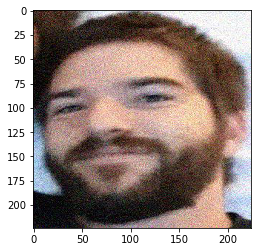

In [46]:
 #see results
i = 26
plt.imshow(x_test_plt[i])
print('Prediction: ' , np.where(predictions[i] <=0.5,'Eva','Edgar'))
print('With an accuracy of:', np.round(score[1]*100,2), '%' )

### SAVE THE MODEL 

Si la Eva es 0 i Edgar es 1 fem que si es mes gran

### REAL TIME

In [47]:
cap = cv2.VideoCapture(0)
from PIL import ImageFont, ImageDraw, Image
# Load our image template, this is our reference image
image_template = cv2.imread('eva2.jpeg', 0) 

while True:

    # Get webcam images
    ret, frame = cap.read()
    
    img = np.resize(frame, (224,224,3))
    im2arr = np.array(img)
    im2arr1 = im2arr.reshape(1,224,224,3)
    
    predictions = model.predict(im2arr1)
    
    if predictions == 0:
        text = "EVA"
    else:
        text = ""
    cv2.putText(frame,text,(30,70), cv2.FONT_HERSHEY_COMPLEX, 2 ,(255,255,255), 6)
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()